In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv("data/ARCOM.csv")

/var/folders/cf/xcc222mj0yg3dzy7mljbx99w0000gn/T/ipykernel_22721/1274466890.py:1: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/ARCOM.csv")


In [4]:
df.columns

Index(['N° Fiche', 'year', 'week', 'N° Version', 'Annonceur', 'Marque',
       'Produit', 'Date', 'Date VP', 'Média', 'Medium', 'Catégorie', 'Support',
       'Format', 'Secteur', 'Classe', 'Groupe', 'Variété', 'N° Groupe/Variété',
       'Signature', 'Script', 'Incrustation', 'Titre', 'Libellé Version',
       'Visuel', 'Mots Clés', 'Thème', 'Musique / Auteur compositeur',
       'Musique / Titre', 'Agence', 'Réalisateur', 'Producteur', 'Récompense',
       'Musique / Version', 'Type de campagne', 'Musique / Interprète',
       'Partenaires', 'Titre émission', 'Hashtag', 'clean_script',
       'mots_clefs_themes', 'mots_clefs_themes_str', 'visuel_str',
       'visuel_clean', 'visuel_clean_bigram', 'clean_bigram_total', 'date_iso',
       'month_nb'],
      dtype='object')

In [25]:
df['mots_clefs_themes']

0        CANARD , BAIN , INCOMPREHENSION , SE MOQUER,ON...
1        FLEUR D'ORANGER , SAVON NOIR , LESSIVE LIQUIDE...
2        CAMERA CACHEE,INTERROGATION, HUMOUR AUTRE, NOC...
3        DEPOT,LEADER, COMPARAISON, ODORAT, RECOMMANDE,...
4        OISEAU , MESANGE , COUPER LA PAROLE , SACHETS ...
                               ...                        
50668    REUNIONS,ENFANT, INNOVATION, LIEN PATERNEL, UN...
50669    ÉGO , FACILITÉ , DURÉE LIMITÉE , GÉNÉREUX , SO...
50670    CASQUE VR , ENTREPOT,EFFICACITE, CHOIX, INNOVA...
50671    ASCENCEUR , CERVEAU , UTERUS , DENT,OBJET PERS...
50672    ENTRAINEUR , CHOISIR , TRUSPILOT , EQUIPE , SE...
Name: mots_clefs_themes, Length: 50673, dtype: object

In [11]:
for i, j in df.loc[:500,['Produit', 'Marque']].iterrows():
    print(j)

Produit    GUIGOZ LAIT INFANTILE
Marque                    GUIGOZ
Name: 0, dtype: object
Produit    LE CHAT EXPERT SAVON NOIR FLEUR ORANGE LIQUIDE
Marque                                            LE CHAT
Name: 1, dtype: object
Produit     CAPTURCALL FR
Marque     RENAULT CAPTUR
Name: 2, dtype: object
Produit    CALGON 2EN1 GAMME
Marque                CALGON
Name: 3, dtype: object
Produit    FRUIT D OR OMEGA 3&6
Marque       FRUIT D OR OMEGA 3
Name: 4, dtype: object
Produit    DUREX LOVERS CONNECT PRESERVATIF
Marque                                DUREX
Name: 5, dtype: object
Produit    CESAR BARQUETTE CHIEN
Marque                     CESAR
Name: 6, dtype: object
Produit    NUROFEN FLASH
Marque           NUROFEN
Name: 7, dtype: object
Produit    MIR LAINE BAUME DE SOIN
Marque                         MIR
Name: 8, dtype: object
Produit    MIR SECRETS DE CUISINIER LIQUIDE VAISSELLE
Marque                                            MIR
Name: 9, dtype: object
Produit    PETIT MARS.RECETTE ME

# Scripts par marques

In [5]:
for i, col in df.loc[df['Marque'] == 'E LECLERC MARQUE REPERE', ['Script']].iterrows():
    print('')
    print('-----------------------------------')
    print(col['Script'])


-----------------------------------
La femme (1) : " C'est pas ma faute si Arthur est déjà un expert culinaire ...
 (1) ... amateur de bon goût à seulement 8 mois.
 (1) ... Moi, j'ai choisi le repas Mots d'enfants de MARQUE REPERE ...
 (1) ... uniquement parce qu'il répond à ses besoin nutritionnel.
 (1) ... Assiette Mots d'enfants de MARQUE REPERE dès 8 mois ...
 (1) ... et seulement 1,40 euro. Et les mamans ça reste propre.
 (1) ... MARQUE REPERE, consommer mieux, ça se décide.
 Voix femme (2) : " LECLERC

-----------------------------------
Voix femme (1) : " Camembert bio village de MARQUE REPERE, ...
 (1) ... bio et seulement 1,98 euros. C'est bio les amis. MARQUE REPERE, consommer mieux ça se décide. "
 Voix femme (2) : " LECLERC. "

-----------------------------------
La blonde (1) : " Avant, les accros du bio, ils avaient que des amis animaux.
 (1) ... Et le bio c'était souvent trop cher pour inviter des amis.
 (1) ... Mais maintenant, on a la gamme Bio Village de MARQUE REPER

# Prevalence topics

In [9]:
theme_se = df['clean_bigram_total']
dates = df['date_iso'].tolist()

mots_cles = theme_se.map(lambda x: [y.strip() for y in x.split(' ')]).tolist()

mots_cles_count = defaultdict(int)

for ad in mots_cles:
    for mot_cle in ad:
        mots_cles_count[mot_cle] += 1
mots_cles_count = dict(sorted(mots_cles_count.items(), key=lambda item: item[1], reverse=True))
mots_cles_count

{'femme': 16173,
 'homme': 12671,
 'jeune': 11090,
 'pratique': 10502,
 'interpellation': 10185,
 'lien_media': 9119,
 'media_internet': 8661,
 'typographie': 8646,
 'enfant': 8363,
 'humour_autre': 6661,
 'choix': 6549,
 'efficacite': 6490,
 'joie': 6266,
 'couple': 6162,
 'famille': 6023,
 'gourmandise': 5868,
 'nouveaute_autre': 5713,
 'effet_visuel': 5710,
 'illustration_visuelle': 5673,
 'bonne_humeur': 5498,
 'personne_celebre_autre': 5392,
 'signature_sonore': 5292,
 'anglais': 5261,
 'quotidien': 5258,
 'interrogation': 5116,
 'discours_prix': 5086,
 'gout': 4962,
 'couleur': 4793,
 'univers_professionnel': 4617,
 'service_autre': 4381,
 'musique_celebre': 4309,
 'comportement_autre': 4277,
 'animal_autre': 4134,
 'conseil': 4128,
 'musique_autre': 3969,
 'partenariat_autre': 3807,
 'grace': 3791,
 'smartphone': 3755,
 'innovation': 3725,
 'personne': 3721,
 'application': 3709,
 'complicite': 3568,
 'signe_de_qualite_autre': 3511,
 'etonnement': 3498,
 'univers_urbain': 3417,


In [11]:
len(mots_cles_count)

44308

# lda with gensim

In [37]:
from gensim import corpora
from gensim.models import LdaModel

from wordcloud import WordCloud

In [26]:
documents = df['clean_bigram_total'].map(lambda x: [y.strip() for y in x.split(' ')]).tolist()

In [27]:
dictionary = corpora.Dictionary(documents)

In [28]:
corpus = [dictionary.doc2bow(doc) for doc in documents]

In [32]:
num_topics = 30
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)


In [33]:
beta_matrix = lda_model.get_topics()

print("Beta Matrix:")
print(beta_matrix)

Beta Matrix:
[[2.0821201e-06 2.0821201e-06 2.0821201e-06 ... 2.0821201e-06
  2.0821201e-06 2.0821201e-06]
 [8.0400508e-07 8.0400508e-07 8.0400508e-07 ... 8.0400508e-07
  8.0400508e-07 8.0400508e-07]
 [5.6223507e-07 5.6223507e-07 5.6223507e-07 ... 5.6223507e-07
  5.6223507e-07 5.6223507e-07]
 ...
 [5.1319273e-07 5.1319273e-07 6.8998820e-04 ... 5.1319273e-07
  5.1319273e-07 5.1319273e-07]
 [1.3531962e-06 1.3531962e-06 1.3531962e-06 ... 1.3531962e-06
  1.3531962e-06 1.3531962e-06]
 [1.8237034e-06 1.8237034e-06 1.8237034e-06 ... 1.8237034e-06
  1.8237034e-06 1.8237034e-06]]


In [34]:
for topic_id in range(num_topics):
    top_words = lda_model.show_topic(topic_id)
    print(f"Topic {topic_id + 1}: {', '.join([word for word, _ in top_words])}")

Topic 1: electrique, jour, evolution, energie, annee, temoigner, temporalite_autre, lune, rue, argent
Topic 2: couleur, effet_visuel, femme, typographie, rouge, espace, blanc, rose, cheval, nature
Topic 3: media_internet, lien_media, interpellation, typographie, image, testimoniale_autre, media_telephonie, solidarite, actualite_sociale, france
Topic 4: femme, soutien, composant_special, effet, gamme, naturel, image_de_synthese, nouveaute_autre, illustration_sensorielle, fleur
Topic 5: univers_professionnel, service_autre, conseil, confiance, film_animation, sequence_montrer, savoir-faire_autre, experience, testimoniale_institutionnelle, univers_entreprise
Topic 6: proximite, client, pluie, univers_meteorologique, communaute, video, burger_king, satisfaction, identification, acheter
Topic 7: musique_autre, anglais, typographie, coeur, ecran, sans_parole, symbole, musique_celebre, signature_etrangere, effet_visuel
Topic 8: cafe, portrait, grande_cause_autre, realiser, desaccord, ensemble

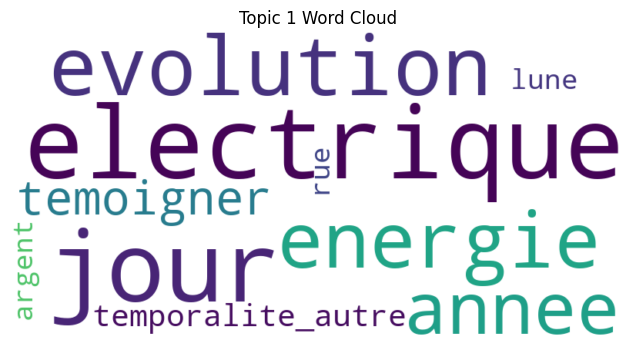

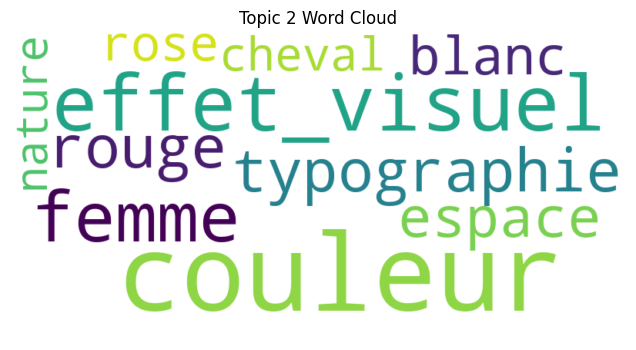

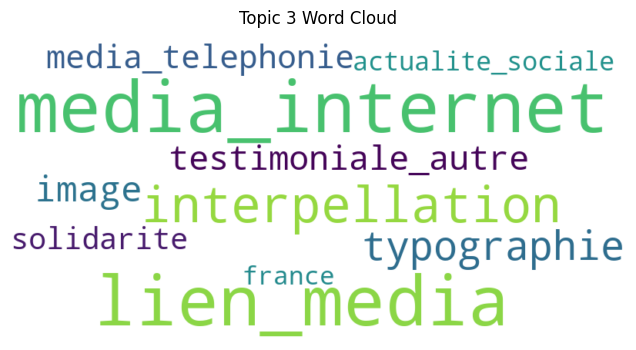

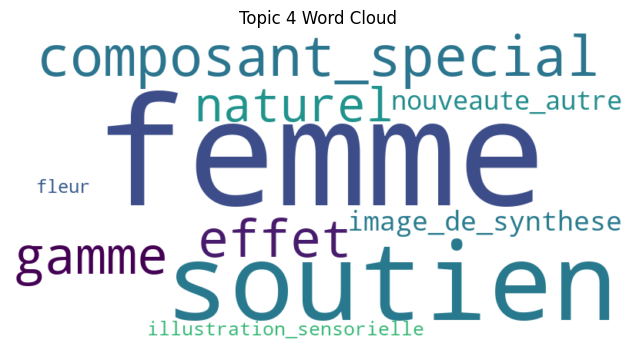

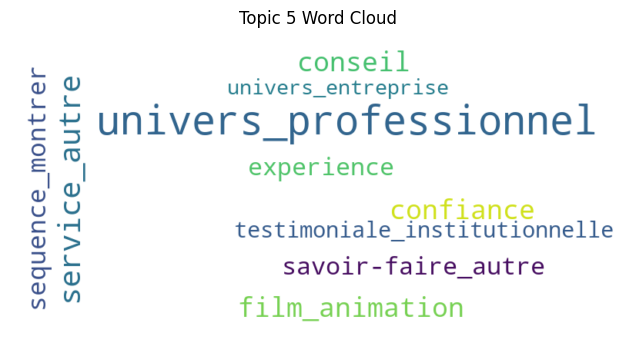

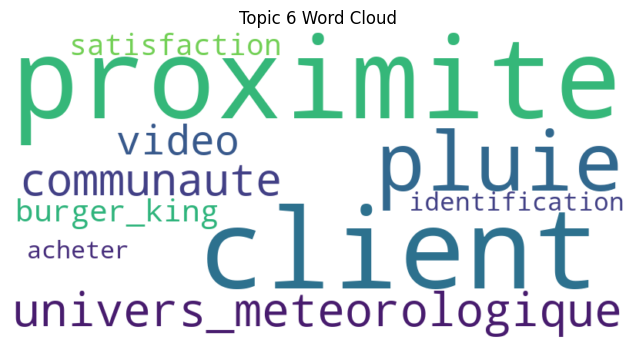

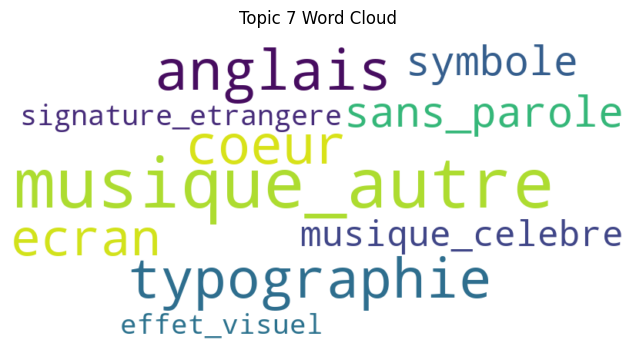

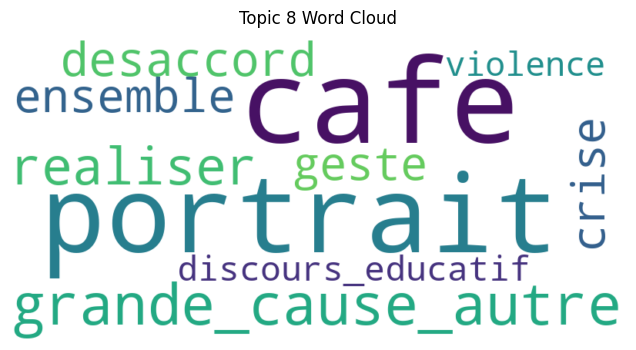

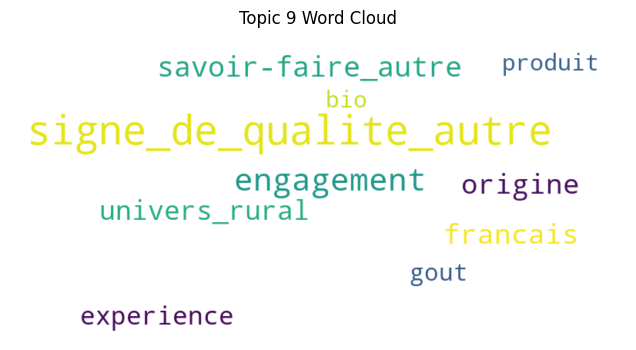

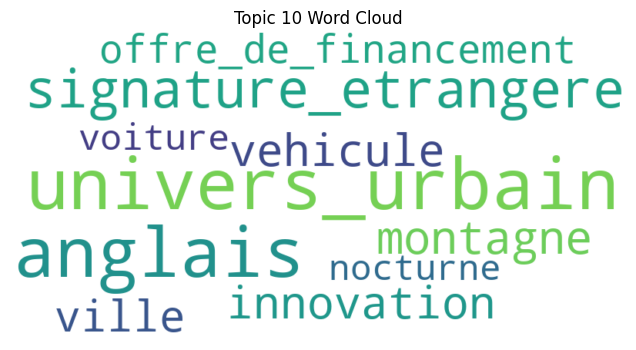

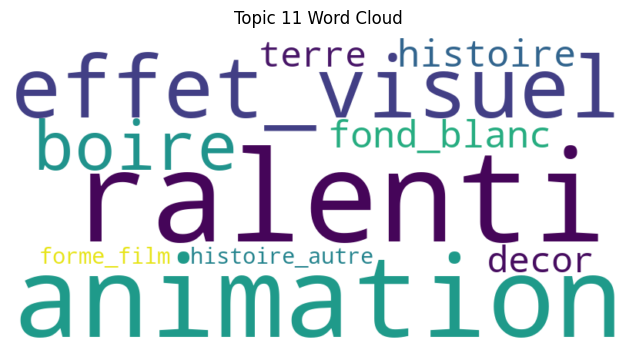

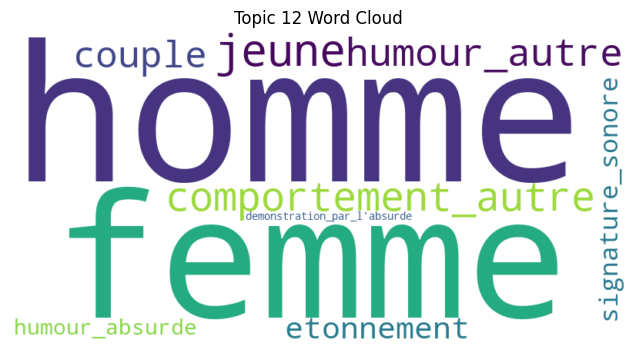

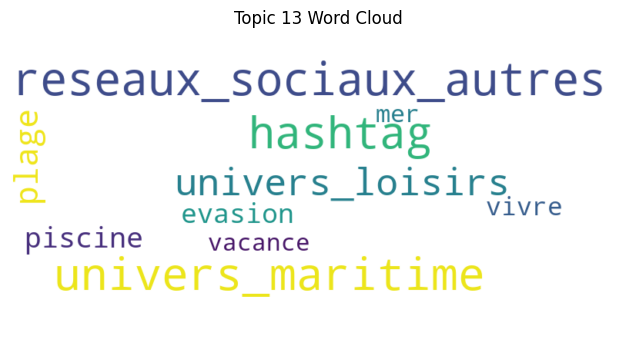

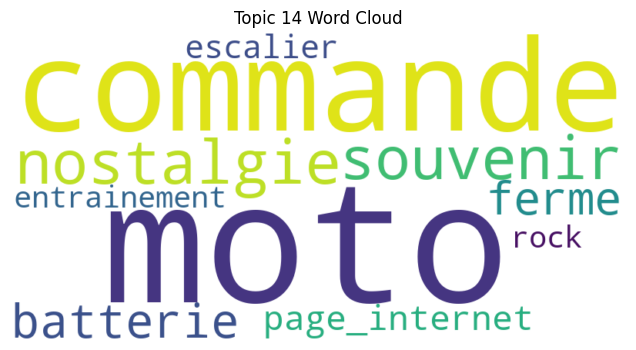

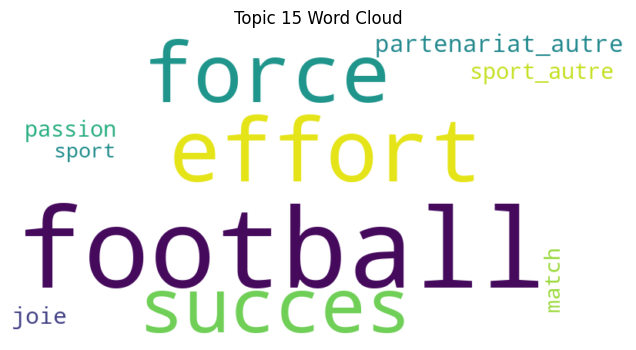

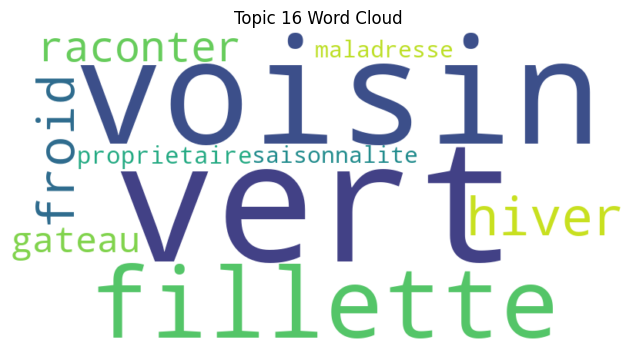

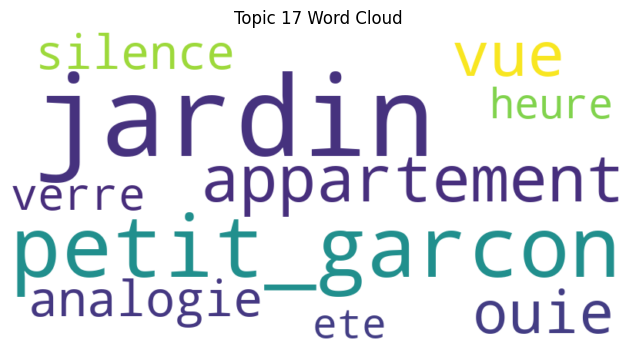

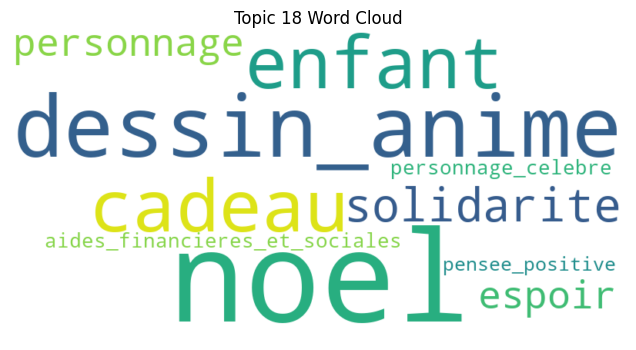

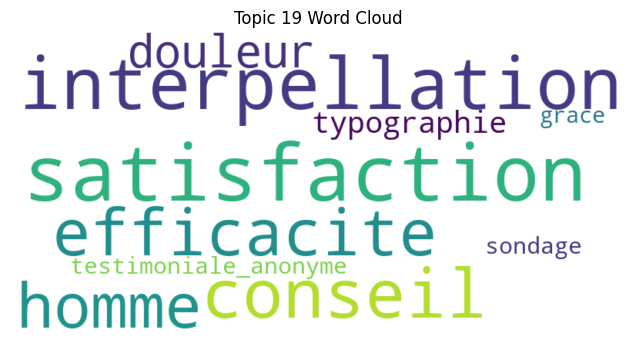

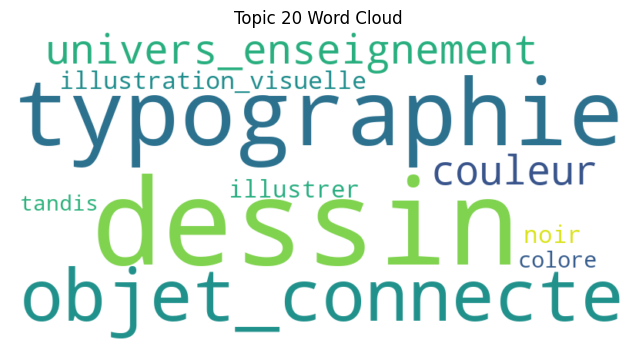

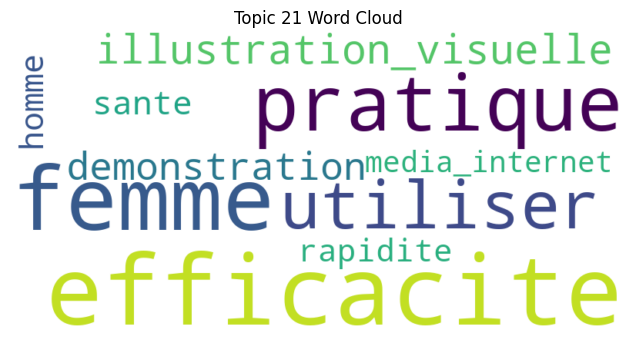

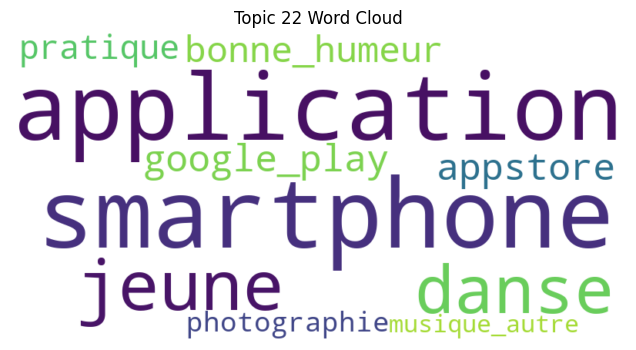

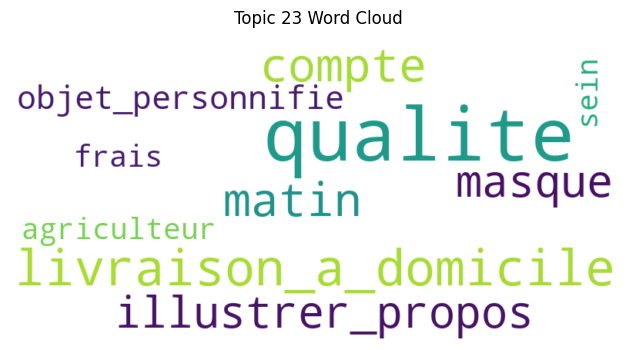

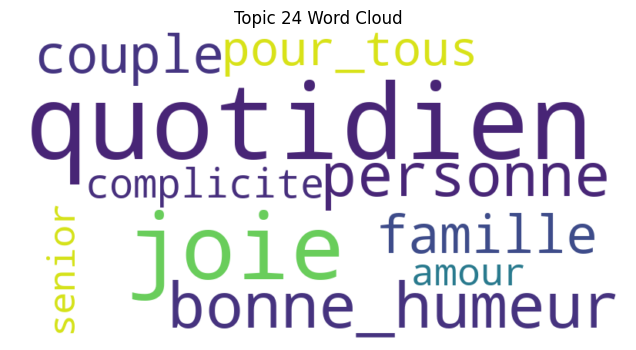

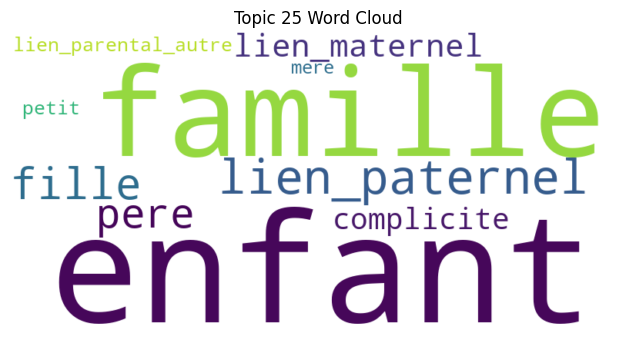

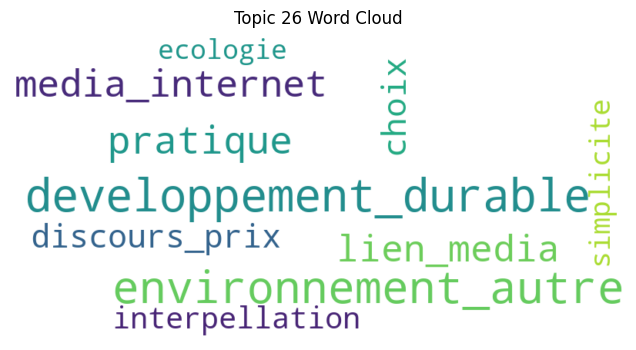

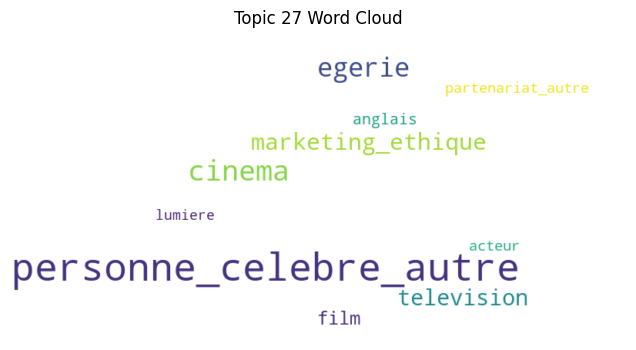

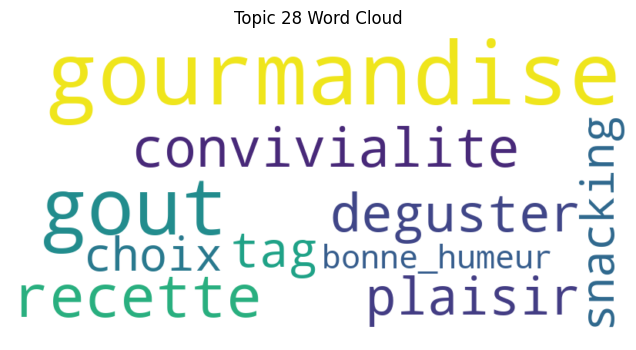

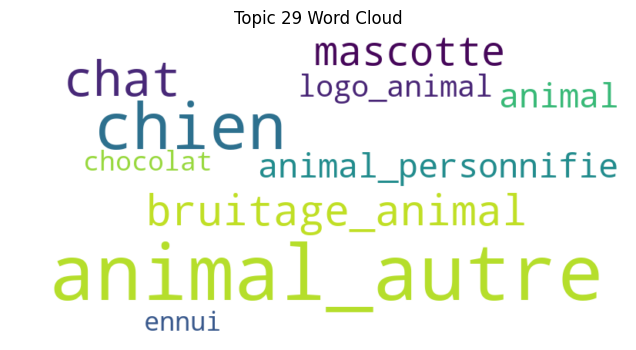

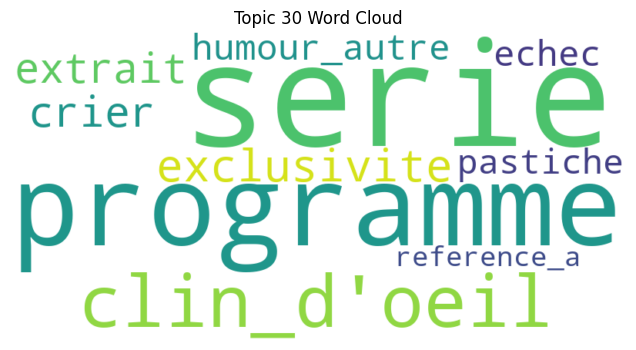

In [38]:
# Generate word clouds for each topic
for topic_id in range(num_topics):
    top_words = dict(lda_model.show_topic(topic_id, topn=10))  # Retrieve top words for the topic
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)
    
    # Plot word cloud for each topic
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id + 1} Word Cloud')
    plt.show()